In [1]:
import pixiedust_node

Pixiedust database opened successfully
Table VERSION_TRACKER created successfully
Table METRICS_TRACKER created successfully

Share anonymous install statistics? (opt-out instructions)

PixieDust will record metadata on its environment the next time the package is installed or updated. The data is anonymized and aggregated to help plan for future releases, and records only the following values:

{
   "data_sent": currentDate,
   "runtime": "python",
   "application_version": currentPixiedustVersion,
   "space_id": nonIdentifyingUniqueId,
   "config": {
       "repository_id": "https://github.com/ibm-watson-data-lab/pixiedust",
       "target_runtimes": ["Data Science Experience"],
       "event_id": "web",
       "event_organizer": "dev-journeys"
   }
}
You can opt out by calling pixiedust.optOut() in a new cell.


Pixiedust runtime updated. Please restart kernel
Table USER_PREFERENCES created successfully
Table service_connections created successfully
Unable to check latest version <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed (_ssl.c:777)>


pixiedust_node 0.2.5 started. Cells starting '%%node' may contain Node.js code.


In [3]:
%%node

var date = new Date();
print(date)

"2019-06-10T23:06:06.641Z"



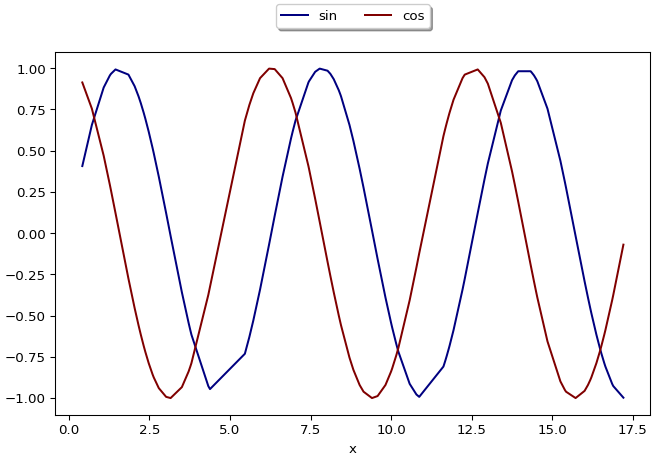

In [4]:
%%node
var data = [];
for (var i = 0; i < 1000; i++) {
    var x = 2*Math.PI * i/ 360;
    var obj = {
      x: x,
      i: i,
      sin: Math.sin(x),
      cos: Math.cos(x),
      tan: Math.tan(x)
    };
    data.push(obj);
}
display(data);

In [5]:
npm.install('request');

/usr/local/bin/npm install -s request
+ request@2.88.0
added 48 packages from 59 contributors and audited 63 packages in 2.436s
found 0 vulnerabilities


In [6]:
%%node
var request = require('request');
var r = {
    method:'GET',
    url: 'http://api.open-notify.org/iss-now.json',
    json: true
};
request(r, function(err, req, body) {
    print(body);
});
// {"timestamp": 1494857069, "message": "success", "iss_position": {"latitude": "24.0980", "longitude": "-84.5517"}}

... ... ... ...
... ...
{"timestamp": 1560208087, "iss_position": {"latitude": "-45.7563", "longitude": "20.5492"}, "message": "success"}


In [7]:
%%node
var request = require('request');
var getPosition = function(callback) {
    var r = {
        method:'GET',
        url: 'http://api.open-notify.org/iss-now.json',
        json: true
    };
    request(r, function(err, req, body) {
        var obj = null;
        if (!err) {
            obj = body.iss_position
            obj.latitude = parseFloat(obj.latitude);
            obj.longitude = parseFloat(obj.longitude);
            obj.time = new Date().getTime();       
        }
        callback(err, obj);
    });
};

... ..... ..... ..... ..... ... ..... ..... ....... ....... ....... ....... ....... ..... ..... ...


In [8]:
%%node
getPosition(function(err, data) {
    print(data);
});
// {"latitude": 50.5736, "longitude": -99.3493, "time": 1494422942373}

... ...
{"latitude": -46.5307, "longitude": 22.692, "time": 1560208114333}


In [9]:
npm.install( ('request', 'request-promise') )

/usr/local/bin/npm install -s request request-promise
+ request@2.88.0
+ request-promise@4.2.4
added 5 packages from 4 contributors, updated 1 package and audited 196 packages in 1.653s
found 0 vulnerabilities


In [10]:
%%node
var request = require('request-promise');
var getPosition = function(callback) {
    var r = {
        method:'GET',
        url: 'http://api.open-notify.org/iss-now.json',
        json: true
    };
    return request(r).then(function(body) {
        var obj = null;
        obj = body.iss_position
        obj.latitude = parseFloat(obj.latitude);
        obj.longitude = parseFloat(obj.longitude);
        obj.time = new Date().getTime();         
        return obj;
    });
};

... ..... ..... ..... ..... ... ..... ..... ..... ..... ..... ..... ..... ...


In [11]:
%%node
getPosition().then(function(data) {
  print(data);
});
// {"latitude": 20.7734, "longitude": -81.5809, "time": 1494857142842}

... ...
{"latitude": -47.1677, "longitude": 24.6087, "time": 1560208138055}


In [12]:
%%node
getPosition().then(print);
// {"latitude": 20.7734, "longitude": -81.5809, "time": 1494857142842}


{"latitude": -47.3505, "longitude": 25.1888, "time": 1560208145169}
